In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
#Load dataset
data=pd.read_csv('ToyotaCorolla - MLR.csv')

In [13]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [15]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [16]:
# Rename columns for consistency
# Assuming 'cc' is equivalent to 'CC' and renaming 'Age_08_04' to 'Age'
data.rename(columns={'cc': 'CC', 'Age_08_04': 'Age', 'Fuel_Type': 'FuelType', 'KM': 'KM', 'HP': 'HP', 'Automatic': 'Automatic', 'Doors': 'Doors', 'Weight': 'Weight', 'Price': 'Price'}, inplace=True)

In [17]:
# Check for missing values
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

### Exploratory Data Analysis (EDA)

- Visualizations

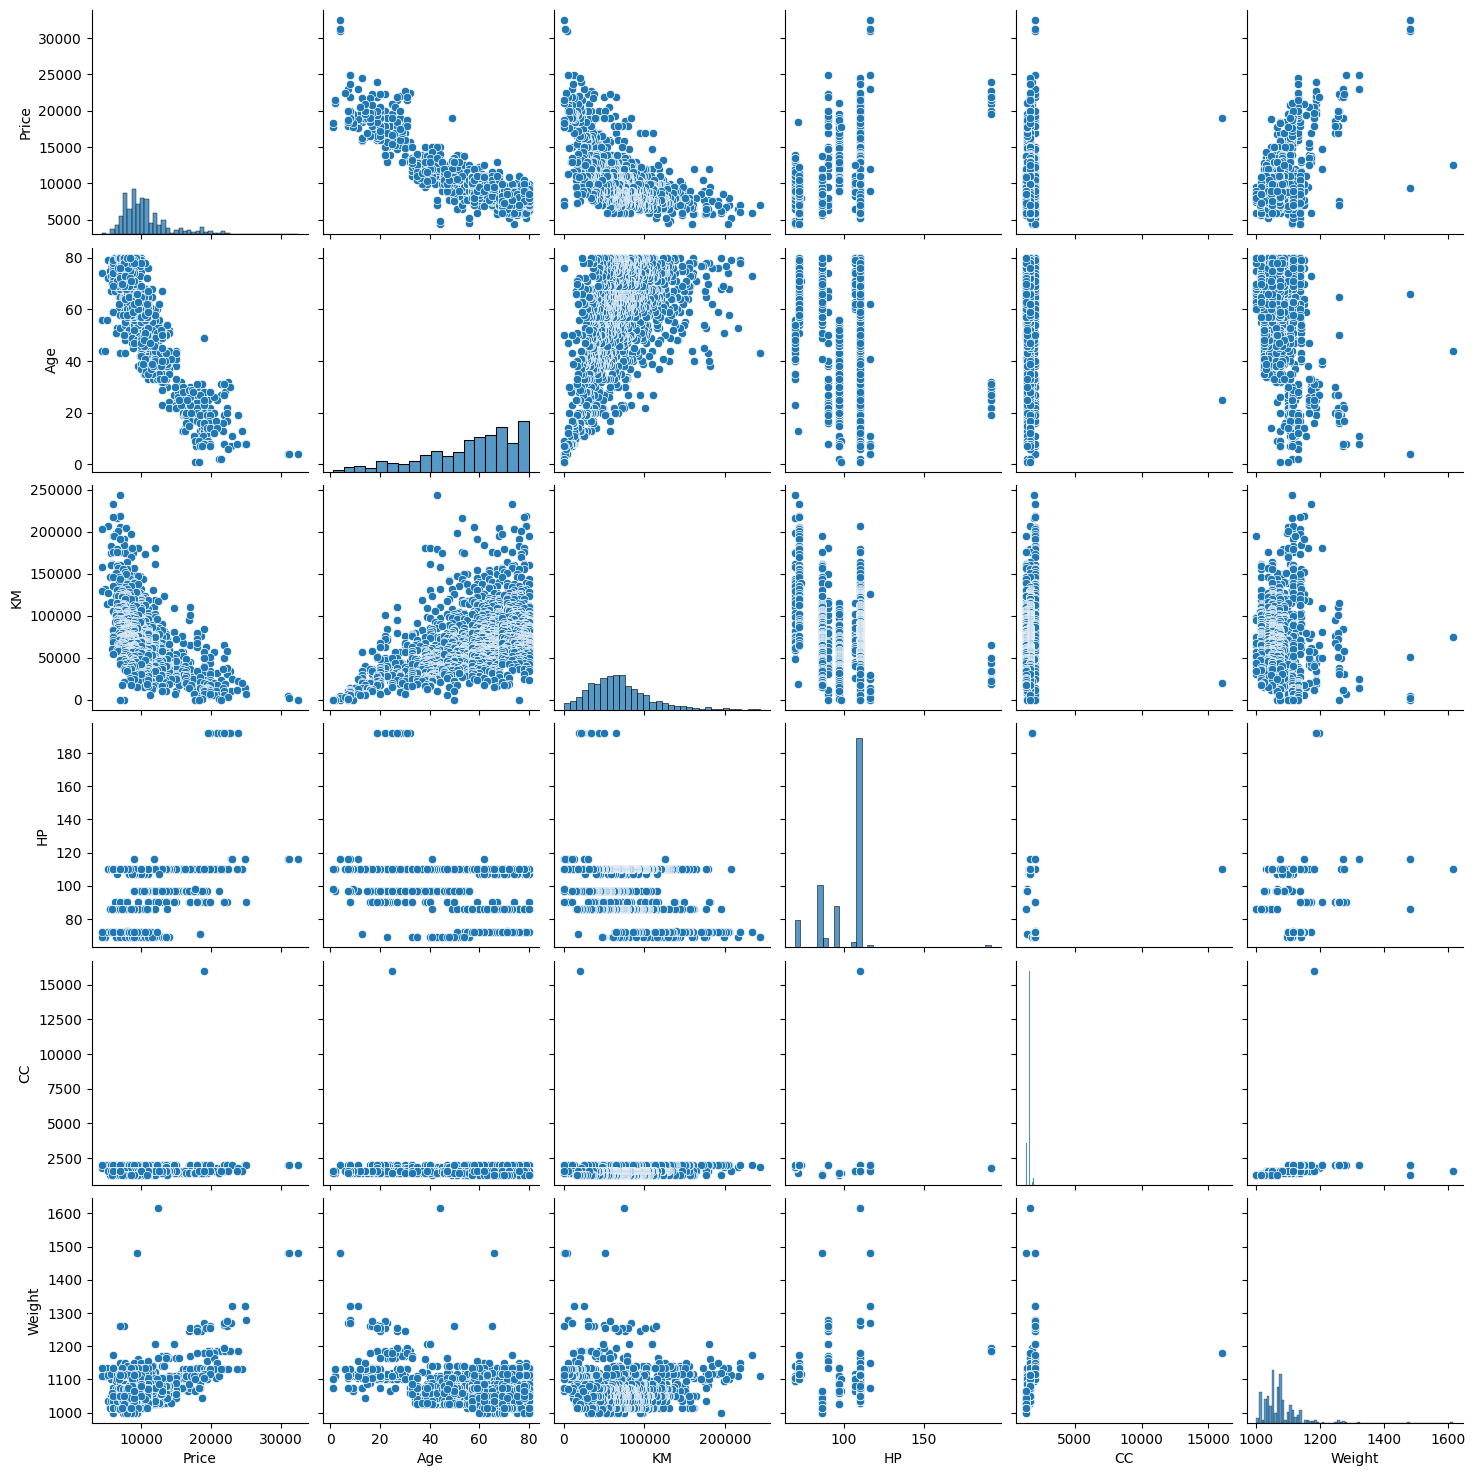

In [18]:
# pairplot
sns.pairplot(data[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']])

/var/folders/g9/0kv3n5gj1xs19b77mflndbfh0000gn/T/ipykernel_92143/175209865.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Heatmap')

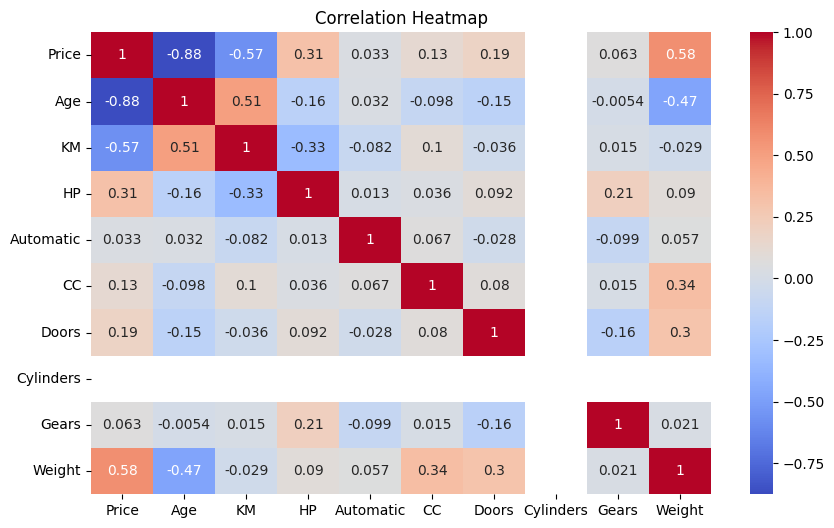

In [19]:
## Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### Data Preprocessing

In [20]:
# One-Hot Encoding for FuelType
cat_features = ['FuelType'] ## Catogorical Features
num_features = ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']  ## Numerical Features

In [21]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),num_features),
                                            ('cat',OneHotEncoder(),cat_features)])

In [22]:
## Split data into features and target
features = data.drop('Price',axis=1)
target=data['Price']

In [23]:
# Split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(288, 10)
(1148,)
(288,)


### Build Multiple Linear Regression Models

In [26]:
 ## Pipeline for Linear Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [28]:
# Fit the model
lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType'])])),
                ('model', LinearRegression())])

In [29]:
model = lr_pipeline.named_steps['model']

In [30]:
model.coef_

array([-2267.15630257,  -600.17999056,   234.13833241,    21.51268877,
         -14.0983108 ,   -80.50083639,  1326.19035183,  -485.96552364,
        -481.76341405,   967.72893769])

In [31]:
model.intercept_

9972.334487020496

In [32]:
y_pred = lr_pipeline.predict(X_test)

In [48]:
## Mean Squared Error
mse_lr=mean_squared_error(y_test,y_pred)
mse_lr

2224306.0403935458

In [49]:
## r2 score
r2_lr=r2_score(y_test,y_pred)
r2_lr

0.8332952678447363

- Lasso Regression

In [35]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

In [36]:
lasso_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType'])])),
                ('model', Lasso(alpha=0.1))])

In [37]:
y_pred_lasso = lasso_pipeline.predict(x_test)

In [46]:
## mean squared error for Lasso
mse_lasso=mean_squared_error(y_test, y_pred_lasso)
mse_lasso

2223928.431144592

In [47]:
## r2 score for Lasso
r2_lasso=r2_score(y_test, y_pred_lasso)
r2_lasso

0.8333235684686445

- Ridge Regression

In [41]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

In [42]:
ridge_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType'])])),
                ('model', Ridge())])

In [43]:
y_pred_ridge = ridge_pipeline.predict(x_test)

In [51]:
mse_rd=mean_squared_error(y_test, y_pred_ridge)
mse_rd

2217280.6845324263

In [53]:
r2_rd=r2_score(y_test, y_pred_ridge)
r2_rd

0.8338217961397887

In [57]:
print("\nModel Performance Summary:")
print(f"Linear Regression: R2 = {(r2_lr):.2f}, MSE = {(mse_lr):.2f}")
print(f"Ridge Regression: R2 = {(r2_rd):.2f}, MSE = {(mse_rd):.2f}")
print(f"Lasso Regression: R2 = {(r2_lasso):.2f}, MSE = {(mse_lasso):.2f}")



Model Performance Summary:
Linear Regression: R2 = 0.83, MSE = 2224306.04
Ridge Regression: R2 = 0.83, MSE = 2217280.68
Lasso Regression: R2 = 0.83, MSE = 2223928.43
